# GPyOpt Optimizer

In [1]:
! pip install gpyopt

  Using cached GPyOpt-1.2.6.tar.gz (56 kB)
     |████████████████████████████████| 1.5 MB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 71 kB 4.2 MB/s eta 0:00:011
  Created wheel for gpyopt: filename=GPyOpt-1.2.6-py3-none-any.whl size=83622 sha256=5deabd07cc07913e542431b27f55f3da32cfb43b532e41777e0c2678de524ecb
  Stored in directory: /Users/guidosidoni/Library/Caches/pip/wheels/e6/fa/d1/f9652b5af79f769a0ab74dbead7c7aea9a93c6bc74543fd3ec
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102549 sha256=c4a626d49d389054cd405f4144d4a9ebea4ca51afcd0008eb19a6e4790ea447e
  Stored in directory: /Users/guidosidoni/Library/Caches/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built gpyopt paramz


In [6]:
from core.trade_service.traders.MA_Trader import MA_Trader
from core.analitics.basic_plots import plot_line_buysell, to_pandas
from datetime import timedelta, datetime
import numpy as np
import pandas as pd
import GPyOpt

In [4]:
%load_ext autoreload
%autoreload 2

In [49]:
bounds = [
    {'name': 'period_short',
     'type': 'discrete',
     'domain': range(1,20)},

    {'name': 'period_long',
     'type': 'discrete',
     'domain': range(15, 40)},

    {'name': 'panic',
     'type': 'continuous',
     'domain': (0, 0.1)}
]

In [50]:
def f(parameters):
    parameters = parameters[0]
    print(parameters)
    model = MA_Trader(mode='sim',
                     period_short=int(parameters[0]),
                     period_long=int(parameters[1]),
                     panic= -parameters[2],
                     interval_group='1h', 
                     interval_source='1h',
                     start_time=datetime.fromisoformat('2020-01-01')
                     )

    model.evaluate()

    return -model.score(1,1)

In [51]:
np.random.seed(777)
optimizer = GPyOpt.methods.BayesianOptimization(
    f=f, 
    domain=bounds,
    acquisition_type ='MPI',
    acquisition_par = 0.1,
    exact_eval=True
)

[8.00000000e+00 3.50000000e+01 2.69205066e-02]
[16.         22.          0.06440293]
[7.00000000e+00 2.90000000e+01 9.33732568e-03]
[1.80000000e+01 3.90000000e+01 7.96858856e-03]
[ 8.         22.          0.05896138]


In [52]:
max_iter = 50
max_time = 1000
optimizer.run_optimization(max_iter, max_time)

[16.         22.          0.08536115]
[16.         22.          0.07413443]
[17.         22.          0.07383891]
[16.         21.          0.07403972]
[16.         23.          0.07808654]
[16.         23.          0.07839002]
[16.         23.          0.07857719]
[16.         23.          0.07867973]
[16.         23.          0.07877073]
[16.        23.         0.0788478]
[16.         23.          0.07890806]
[16.         23.          0.07899208]
[16.         23.          0.07898435]
[16.         23.          0.07901872]
[16.         23.          0.07905176]
[16.         23.          0.07916382]
[16.         23.          0.07930728]
[16.         23.          0.07885877]
[16.         23.          0.07905536]
[16.         23.          0.07914551]
[16.         23.          0.07997037]
[16.         23.          0.07913746]
[16.         23.          0.07918399]
[16.         23.          0.07920796]
[16.         23.          0.07920652]
[16.         23.          0.07922925]
[16.         23

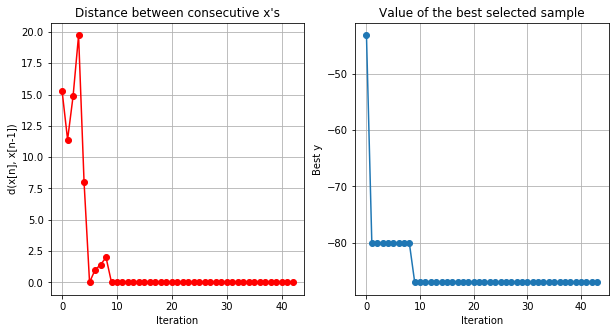

In [53]:
optimizer.plot_convergence()

In [54]:
optimizer.X[np.argmin(optimizer.Y)]

array([16.        , 23.        ,  0.07808654])

In [63]:
model = MA_Trader(mode='sim',interval_group='1h', interval_source='1h', period_short=16,period_long=23,panic=-.078,start_time=datetime.fromisoformat('2020-01-01'))
model.evaluate()
model.score(1,1)

86.98974021393038

In [65]:
model = MA_Trader(mode='sim',interval_group='1h', interval_source='1h', period_short=14,period_long=25,panic=-.03,start_time=datetime.fromisoformat('2020-01-01'))
model.evaluate()
model.score(1,1)

100.47557409855013